In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import pandas as pd


In [ ]:
pip install git+https://github.com/jkirkby3/pymle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/jkirkby3/pymle to /tmp/pip-req-build-cfk8d846
  Running command git clone -q https://github.com/jkirkby3/pymle /tmp/pip-req-build-cfk8d846
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for PyMLE: filename=PyMLE-0.0.1-py3-none-any.whl size=38015 sha256=9037a522ae372f0080a97e17baf84f324afbfa2b2814f95ebebad837a62cd9ca
  Stored in directory: /tmp/pip-ephem-wheel-cache-kdzd8to0/wheels/cd/1e/47/b1240ec565910918e972d8bc400bc27859de0658a5cc94b937
Successfully built PyMLE


In [ ]:
T = 1
N = 100
x0 = 10
t = np.linspace(0, T, N + 1)
delta = np.sqrt(T / N)

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


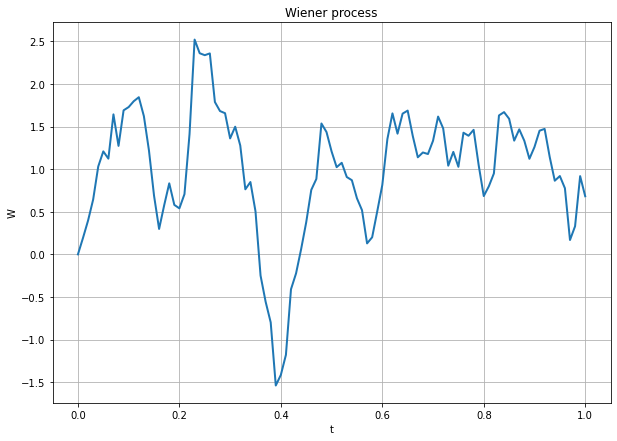

In [ ]:
def f(X, delta): 
    W=[]
    W+=[0]
    for i in range(1,len(X)):
      W+=[W[i-1] + np.random.normal(0, 1, 1)*np.sqrt(delta)] 
    return W
def wiener_process():
    X=[i/N for i in range(N+1)] 
    W=f(X, delta)
    plt.figure(figsize=(10, 7)) 
    plt.grid()
    plt.plot(X, W, linewidth=2.0) 
    plt.title("Wiener process") 
    plt.xlabel("t") 
    plt.ylabel("W")
    plt.show()
wiener_process()

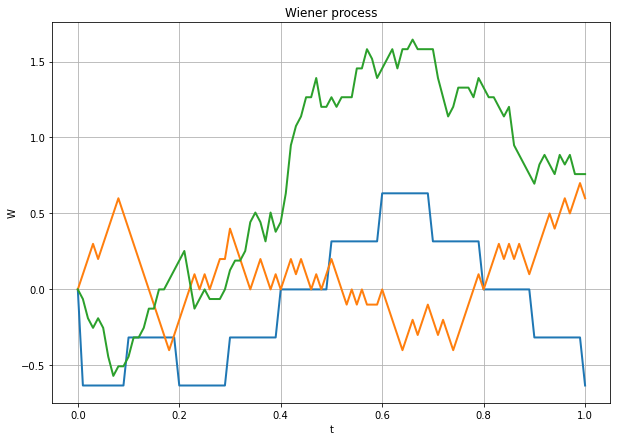

In [ ]:
def runif(n): 
  L = []
  for i in range(n): 
    L += [2*(np.random.uniform(0, 1)>0.5)-1]
  return L

def function(x, n, S):
  if x*n>0:
    return S[int(x*n)-1] 
  else:
    return 0 

def countS(N, n):
  S = np.cumsum(runif(n))
  W = [function(x, n, S)/np.sqrt(n) for x in t]
  plt.plot(t, W, linewidth=2.0)


def wiener_process_as_limit():    
    plt.figure(figsize=(10, 7))
    plt.grid()

    n = [10, 100, 1000]
    for i in n:
      countS(N, i)
      
    plt.title("Wiener process")
    plt.xlabel("t")
    plt.ylabel("W")
    
wiener_process_as_limit()

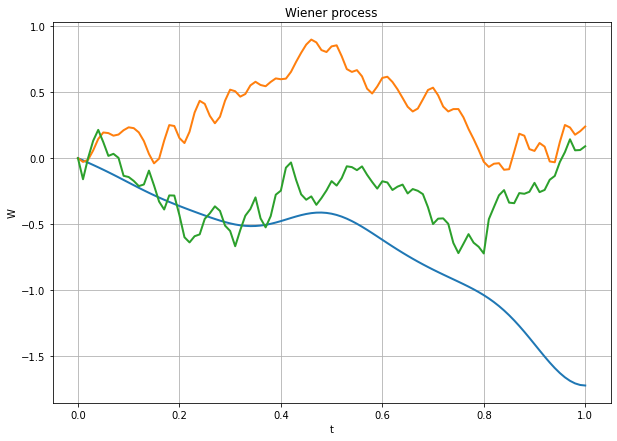

In [ ]:
def phi(i,t,T):
  return (2*np.sqrt(2*T))/((2*i+1)*np.pi)*np.sin(((2*i+1)*np.pi*t)/(2*T)) 
  
def sum_W(t,T,Z):
  Sum=0
  for i in range(len(Z)):
    Sum+=Z[i]*phi(i,t,T) 
  return Sum

def brownian_motion_as_L(T, N, t):
    n = [10, 50, 100]
    Z = np.random.normal(0, 1, n)
    plt.figure(figsize = (10, 7))
    plt.grid()

    for k in n:
        W = []
        Z = np.random.normal(0, 1, k)
        for i in range(N + 1):
            W += [sum_W(t[i], T, Z)]
        plt.plot (t, W, linewidth =2.0)

    plt.title ('Wiener process')
    plt.xlabel ("t")
    plt.ylabel ("W")

brownian_motion_as_L(T,N,t)

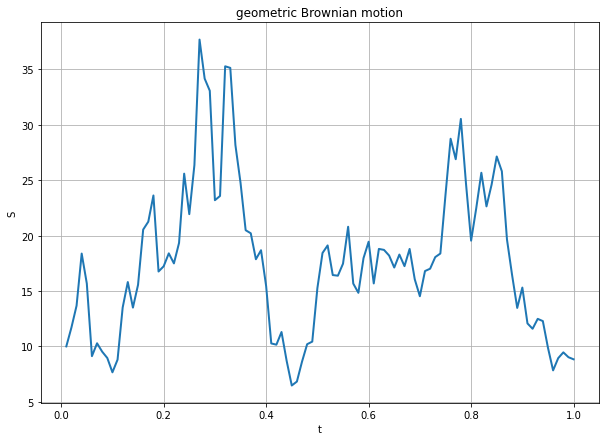

In [ ]:

t = np.linspace (0,T , N +1)

def geometric_Brownian_motion(T, N, t, Delta):
    r = 1
    sigma = 0.5
    x = 10
    W = np.zeros(N)
    for i in range(1, N):
        W[i]= W[i-1] + np.random.normal(0, 1) * np.sqrt(Delta)
    S = [x * np.exp((r - sigma ** 2 / 2) * t[i] + sigma * W[i]) for i in range (len(W))]
    plt.figure ( figsize =(10, 7) )
    plt.grid()
    plt.plot(t[1:], S, linewidth =2.0)
    plt.title('geometric Brownian motion')
    plt.xlabel("t")
    plt.ylabel("S")
    plt.show()
geometric_Brownian_motion(T, N, t, delta)

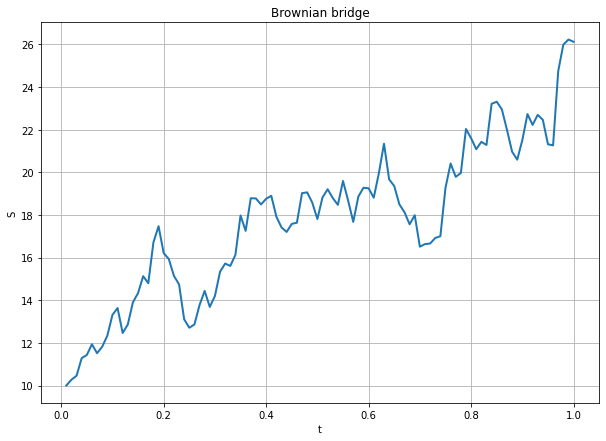

In [ ]:
def brownian_bridge(T, N, t):
    r = 1
    sigma = 0.5
    x = 10
    W = np.zeros(N)
    for i in range(1, N):
        W[i]= W[i -1] + np.random.normal(0, 1, 1) * delta
    S = [ x * np.exp (( r - sigma ** 2 / 2) * t [ i ] + sigma * W [ i ]) for i in range (len( W ) ) ]
    plt.figure(figsize = (10, 7))
    plt.grid()
    plt.plot(t[1:] , S , linewidth =2.0)
    plt.title('Brownian bridge')
    plt.xlabel("t")
    plt.ylabel("S")
    plt.show()
brownian_bridge(T, N, t)

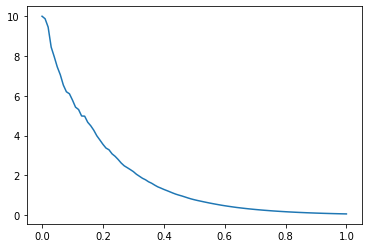

In [ ]:
def BM(T, N, t, Delta):
    W = [0]
    X = np.linspace(0, T, N + 1)
    for i in range (1, len(X)):
        W1 = W[i - 1] + np.random.normal(0, 1) * Delta
        W.append(W1)
    return W

def Ornstein_Uhlenbeck(T, N, t, Delta, x0, W):
    theta = 5
    sigma = 3.5
    integr = []
    xt = []
    for i in range(1, N):
        integr1 = np.exp(-theta * t[i-1]) * (W[i] - W[i - 1])
        integr.append(integr1)
    for it, i in enumerate(t):
        xt1 = np.exp(- theta * t[it]) * (x0 + sigma * np.sum(integr[0:it]))
        xt.append(xt1)
    return xt
W = BM(T, N, t, delta)
plt.plot(t, Ornstein_Uhlenbeck(T, N, t, delta, x0, W), label='Ornstein Uhlenbeck')


In [ ]:
def CIR(X, theta1, theta2, theta3, dt):
    dx = (theta1 - theta2 * X) * dt + theta3 * np.sqrt(X) * np.random.normal(0, np.sqrt(dt))
    return dx

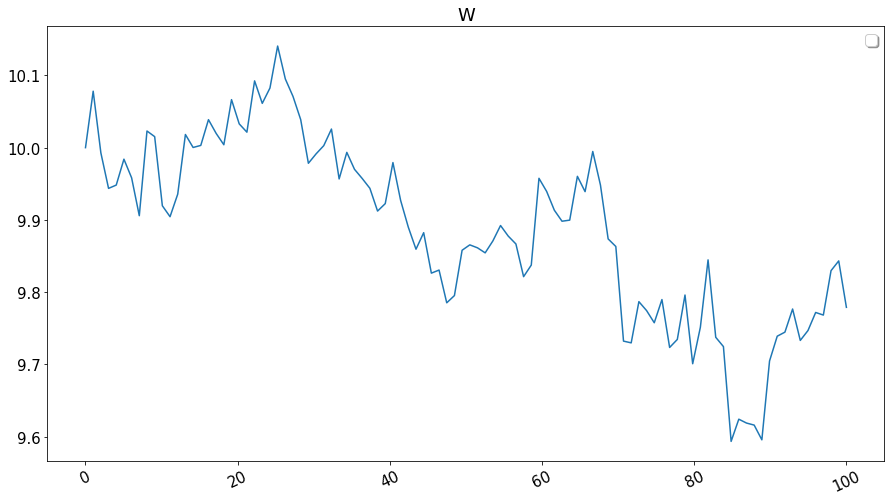

In [ ]:
theta1 = 2.0
theta2 = 0.2
theta3 = 0.15

N = 100
X = np.zeros(N)
X[0] = x0
for i in range(1, len(X)):
    X[i] = X[i - 1] + CIR(X[i - 1], theta1, theta2, theta3, 1 / N)
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()
plt.plot(np.linspace(0, N, N), X)
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.xticks(rotation=25)

fig.set_figwidth(15)
fig.set_figheight(8)

plt.title('W')
plt.show()

In [ ]:
def CIR_modify(X, theta1, theta2, dt):
    dx = -theta1 * X * dt + theta2 + np.sqrt(1+X**2) * np.random.normal(0, np.sqrt(dt))
    return dx

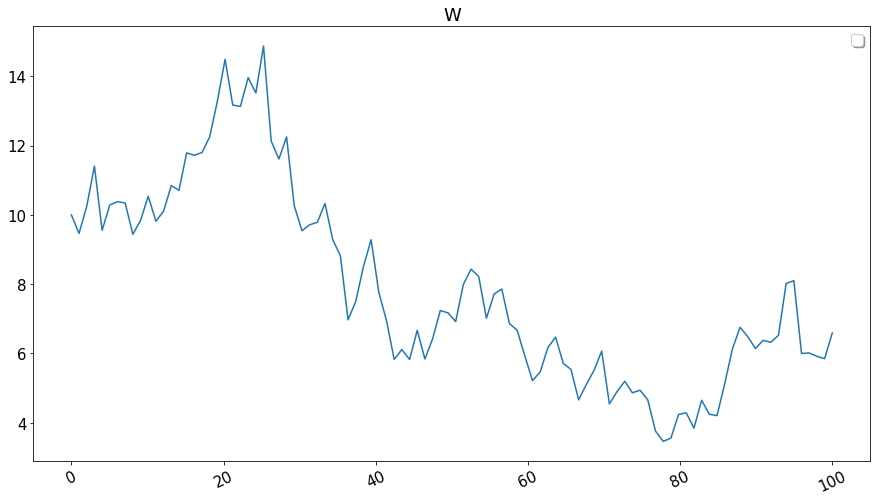

In [ ]:
theta1 = 2.0
theta2 = 0.2
N = 100
X = np.zeros(N)
X[0] = x0
for i in range(1, len(X)):
    X[i] = X[i - 1] + CIR_modify(X[i - 1], theta1, theta2, 1 / N)
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()
plt.plot(np.linspace(0, N, N), X)
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.xticks(rotation=25)

fig.set_figwidth(15)
fig.set_figheight(8)

plt.title('W')
plt.show()

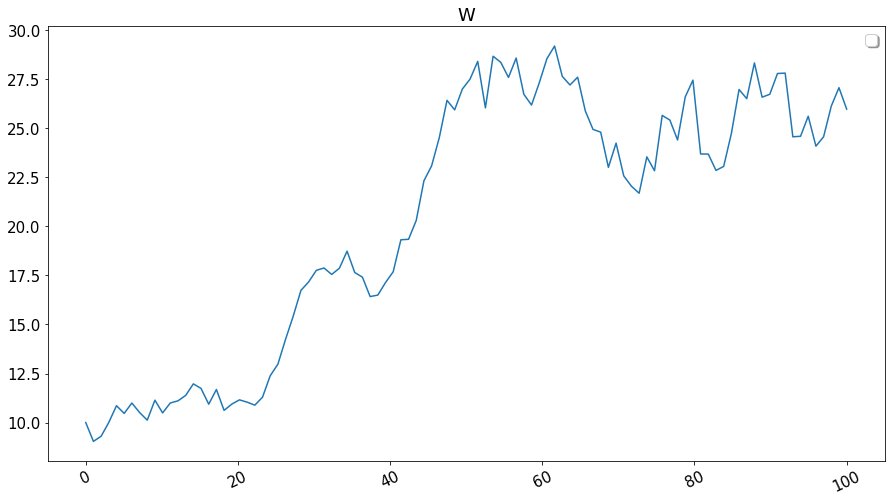

In [ ]:
def Black_Scholes(X, mu, sigma, dt):
  dst = mu * X * dt + sigma * X * np.random.normal(0, np.sqrt(dt))
  return dst

X = np.zeros(N)
X[0] = 10
mu = 1.0
sigma = 0.5
for i in range(1, len(X)):
    X[i] = X[i - 1] + Black_Scholes(X[i - 1], mu, sigma, 1 / N)
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()
plt.plot(np.linspace(0, N, N), X)
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.xticks(rotation=25)

fig.set_figwidth(15)
fig.set_figheight(8)

plt.title('W')
plt.show()

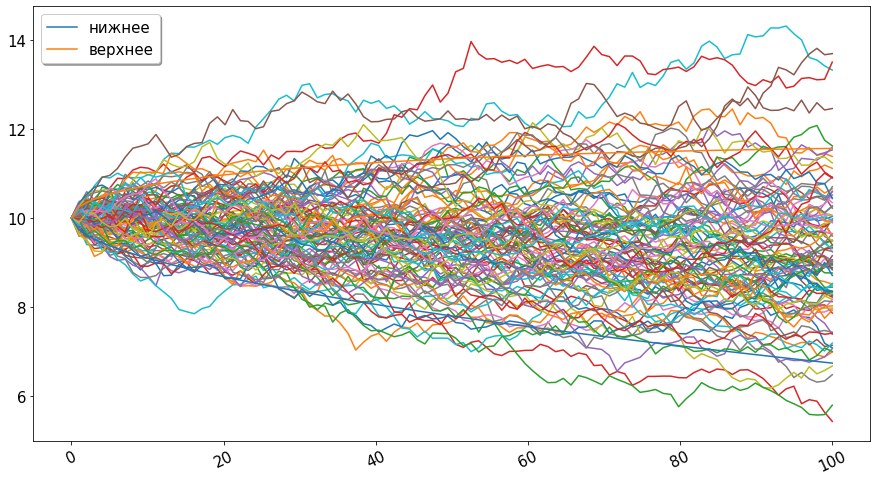

In [ ]:
def k(alpha, sigma):
    return (4 * alpha) / (sigma ** 2)
def zeta(t, s, N, sigma, beta):
    return (sigma ** 2) * (1 - np.exp(-beta * (t / N - s / N))) / (4 * beta)
def count_lambda(t, s, N, x, sigma, beta):
    return 4 * beta * np.exp(-beta * (t / N - s / N)) * x / (sigma ** 2 * (1 - np.exp(-beta * (t / N - s / N))))
def xi(alpha_0):
    return norm.ppf(1 - alpha_0/2)
def v_lower(k, zeta, my_lambda, xi):
    return zeta * (k + my_lambda - xi * np.sqrt(2 * (k + 2 * my_lambda)))
def v_upper(k, zeta, my_lambda, xi):
    return zeta * (k + my_lambda + xi * np.sqrt(2 * (k + 2 * my_lambda)))
def CIR(X, theta, beta, sigma, dt):
    dx = theta * (beta - X) * dt + sigma * np.sqrt(X) * np.random.normal(0, np.sqrt(dt))
    return dx
N = 100
X = np.zeros((N, N))
theta = 0.10
sigma = 0.50
beta = 0.10
for j in range(0, N):
    X[j][0] = 10
    for i in range(1, N):
        X[j][i] = X[j][i - 1] + CIR(X[j][i - 1], theta, beta, sigma, 1 / N)
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()
for j in range(N):
    plt.plot(np.linspace(0, N, N), X[j])

vlower = np.zeros(N)
vupper = np.zeros(N)
vlower[0] = X[0][0] = 10
vupper[0] = X[0][0] = 10

k = k(theta, sigma)
xi = xi(0.1)

for i in range(1, N):
    zet = zeta(i, 0, N, sigma, beta)
    my_lambda = count_lambda(i, 0, N, 10, sigma, beta)
    vlower[i] = v_lower(k, zet, my_lambda, xi)
    vupper[i] = v_upper(k, zet, my_lambda, xi)

plt.plot(np.linspace(0, N, N), vlower, label="нижнее", mec='b')
plt.plot(np.linspace(0, N, N), vupper, label="верхнее", mec='r')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.xticks(rotation=25)
fig.set_figwidth(15)
fig.set_figheight(8)
plt.show()


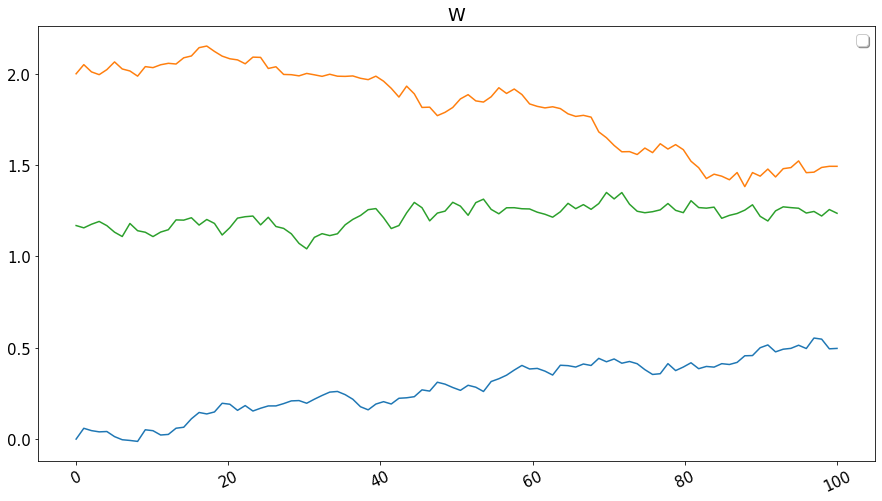

In [ ]:
def Ornshtein_Uhlenbeck(X, theta, mu, sigma, dt):
    dx = theta * (mu - X) * dt + sigma * np.random.normal(0, np.sqrt(dt))
    return dx
first = np.zeros(N)
second = np.zeros(N)
third = np.zeros(N)
theta = 1.0
mu = 1.2
sigma = 0.3
first[0] = 0.0
second[0] = 2.0
third[0] = np.random.normal(mu, (sigma ** 2) / 2 * theta)
for i in range(1, len(X)):
    first[i] = first[i - 1] + Ornshtein_Uhlenbeck(first[i - 1], theta, mu, sigma, 1 / N)
    second[i] = second[i - 1] + Ornshtein_Uhlenbeck(second[i - 1], theta, mu, sigma, 1 / N)
    third[i] = third[i - 1] + Ornshtein_Uhlenbeck(third[i - 1], theta, mu, sigma, 1 / N)
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()
plt.plot(np.linspace(0, N, N), first)
plt.plot(np.linspace(0, N, N), second)
plt.plot(np.linspace(0, N, N), third)
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.xticks(rotation=25)
fig.set_figwidth(15)
fig.set_figheight(8)
plt.title('W')
plt.show()


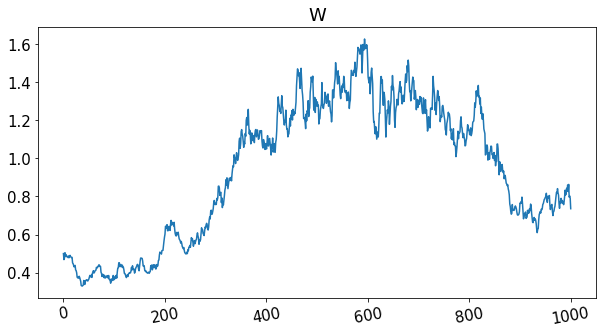

In [ ]:
mu = 0
N =1000
sigma = 1
X = np.zeros(N)
X[0] = 0.5
for i in range(1, N):
    X[i] = X[i - 1] + Black_Scholes(X[i - 1], mu, sigma, 1 / N)
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()
plt.plot(np.linspace(0.0, len(X), num=len(X)), X, label='')
plt.xticks(rotation=10)
fig.set_figwidth(10)
fig.set_figheight(5)
plt.title('W')
plt.show()

t_0.5 =  0.98


Text(0, 0.5, 't')

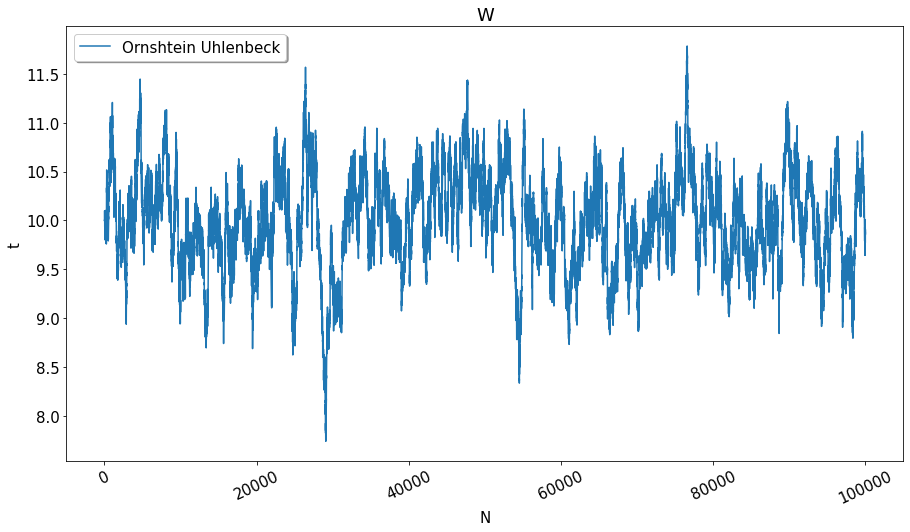

In [ ]:
N = 100000
X = np.zeros(N)
X[0] = x0
theta = 0.5
mu = x0
sigma = 0.5
for i in range(1, len(X)):
    X[i] = X[i - 1] + Ornshtein_Uhlenbeck(X[i - 1],theta, mu, sigma, 365 / N)

z_lag = np.roll(X, 1)
z_lag[0] = 0
z_ret = X - z_lag
z_ret[0] = 0
z_lag2 = sm.add_constant(z_lag)
model = sm.OLS(z_ret,z_lag2)
res = model.fit()
halflife = (- np.log(2) / res.params[1] ) / 365 * T
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()
plt.plot(np.linspace(0, N, N), X, label = "Ornshtein Uhlenbeck")
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.xticks(rotation=25)
fig.set_figwidth(15)
fig.set_figheight(8)

plt.title('W')
print("t_0.5 = ", round(halflife, 2))
plt.xlabel("N")
plt.ylabel("t")

In [ ]:
#Эйлер

def Ornshtein_Uhlenbeck(S, mu, sigma, dt, dW):
    dS = -mu * S * dt + sigma * dW
    return dS

def CIR(S, theta1, theta2, sigma, dt, dW):
    dS = (theta1 - theta2 * S) * dt + sigma * np.sqrt(S) * dW
    return dS

def Black_Scholes(S, mu, sigma, dt, dW):
    dS = mu * S * dt + sigma * S * dW
    return dS

#Мильштейн

def Milstein_Ornshtein_Uhlenbeck(S, mu, sigma, dt, dW):
    dS = -mu * S * dt + sigma * dW
    return dS

def Milstein_CIR(S, theta1, theta2, sigma, dt, dW):
    dS = (theta1 - theta2 * S) * dt + sigma * np.sqrt(S) * dW + (sigma**2) * ((dW**2) - dt) / 4 
    return dS

def Milstein_Black_Scholes(S, mu, sigma, dt, dW):
    dS = mu * S * dt + sigma * S * dW + (sigma**2) * S * ((dW**2) - dt) / 2
    return dS

#Предиктор-корректор

def Predict_Ornshtein_Uhlenbeck(S, pS, theta, sigma, dt, dW, alpha, eta):
    baS  = -theta * S
    bapS = -theta * pS
    dS = alpha * bapS + (1-alpha) * bapS * dt + eta * sigma + (1 - eta) * sigma * dW
    return dS

def Predict_CIR(S, pS, theta1, theta2, sigma, dt, dW, alpha, eta):
    baS  = (theta1 - theta2 * S) - eta * (sigma**2) / 2 
    bapS = (theta1 - theta2 * pS) - eta * (sigma**2) / 2 
    dS = alpha * bapS + (1 - alpha) * baS * dt + eta * sigma * np.sqrt(pS) + (1 - eta) * sigma * np.sqrt(S) * dW
    return dS

def Predict_Black_Scholes(S, pS, mu, sigma, dt, dW, alpha, eta):
    baS  = mu * S - eta * (sigma**2) * S
    bapS = mu * pS - eta * (sigma**2) * pS
    dS = alpha * bapS + (1 - alpha) * baS * dt + eta * sigma * pS + (1-eta) * sigma * S * dW
    return dS

#2 Мильштейн

def M2_Ornshtein_Uhlenbeck(S, theta, sigma, dt, dW):
    dS = - theta * S * dt + sigma * dW - theta * dt * dW / 2 + (theta**2) * S * (dt**2) / 2 
    return dS

def M2_CIR(S, theta1, theta2, sigma, dt, dW):
    dS = (theta1 - theta2 * S - (sigma**2)/4) * dt + sigma * np.sqrt(S) * dW + (dW**2) * (sigma**2) / 4 \
    + dt * dW * (sigma * (theta1 - theta2 * S) / (4 * np.sqrt(S)) - theta2 * sigma * np.sqrt(S) / 2 - (sigma**3) / 4 / np.sqrt(S)) \
    - theta2 * (theta1 - theta2 * S) * (dt**2) / 2
    return dS

def M2_Black_Scholes(S, mu, sigma, dt, dW):
    dS = S * (mu - (sigma**2)/2) * dt + sigma * S * dW + (sigma**2) * S * (dW**2)\
    + dt * dW * mu * S * sigma + S * (mu**2) * (dt**2) / 2
    return dS


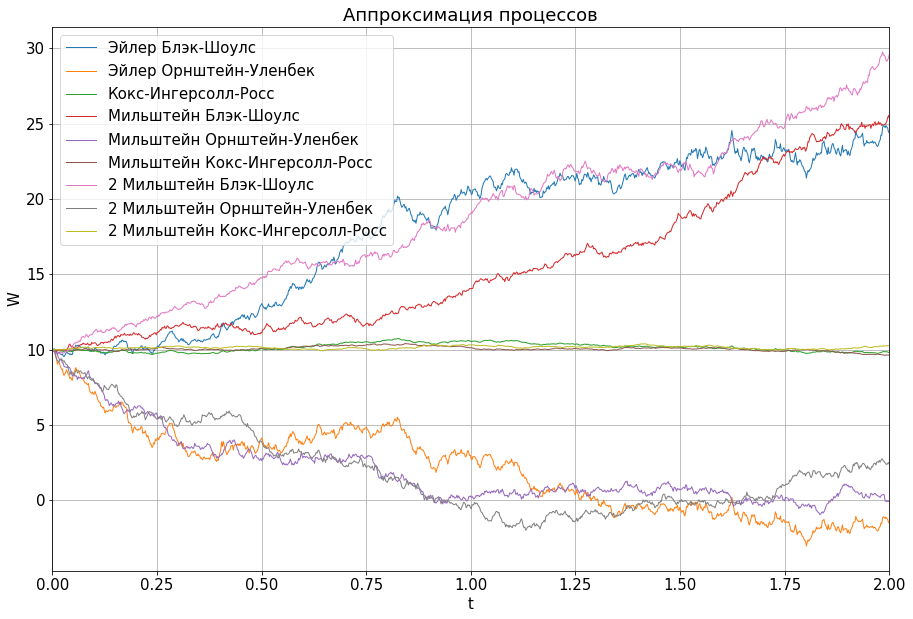

In [ ]:
def Wiener_proc(N, T):
    W = np.zeros(N)  
    delta = T / N
    sqrt_delta = np.sqrt(delta)    
    for i in range (1, N):
        W[i] += W[i-1] + np.random.normal(0, sqrt_delta)
    return W

W  = Wiener_proc(N, T)
dW = 0


T = 2
time_line, dt = np.linspace(0, T, N, retstep=True)
alpha = 0.33
eta   = 0.25
N = 1000


S_bs, S_ou, S_cir = np.zeros(N), np.zeros(N), np.zeros(N)
PS_bs, PS_ou, PS_cir = np.zeros(N), np.zeros(N), np.zeros(N)
MS_bs, MS_ou, MS_cir = np.zeros(N), np.zeros(N), np.zeros(N)
M2S_bs, M2S_ou, M2S_cir = np.zeros(N), np.zeros(N), np.zeros(N)

S_bs[0], S_ou[0], S_cir[0] = 10, 10, 10
PS_bs[0], PS_ou[0], PS_cir[0] = 10, 10, 10
MS_bs[0], MS_ou[0], MS_cir[0] = 10, 10, 10
M2S_bs[0], M2S_ou[0], M2S_cir[0] = 10, 10, 10

for i in range(1, N):
    dW = W[i] - W[i-1] 
    dt = 1/N
    # Эйлер
    S_bs[i] = S_bs[i-1] + Black_Scholes(S_bs[i-1], 1, 0.2, dt, dW)       
    S_ou[i] = S_ou[i-1] + Ornshtein_Uhlenbeck(S_ou[i-1], 5, 3.5, dt, dW)       
    S_cir[i]  = S_cir[i-1] + CIR(S_cir[i-1], 2, 0.2, 0.15, dt, dW) 
    
    # Мильштейн
    MS_bs[i] = MS_bs[i-1] + Milstein_Black_Scholes(MS_bs[i-1], 1, 0.2, dt, np.random.normal(0, np.sqrt(dt)))    
    MS_ou[i]  = MS_ou[i-1] + Milstein_Ornshtein_Uhlenbeck(MS_ou[i-1], 5, 3.5, dt, np.random.normal(0, np.sqrt(dt)))
    MS_cir[i] = MS_cir[i-1] + Milstein_CIR(MS_cir[i-1], 2, 0.2, 0.15, dt, np.random.normal(0, np.sqrt(dt)))
    
    # 2 Мильштейн
    M2S_bs[i] = M2S_bs[i-1] + M2_Black_Scholes(S_bs[i-1], 1, 0.2, dt, np.random.normal(0, np.sqrt(dt)))    
    M2S_ou[i]  = M2S_ou[i-1] + M2_Ornshtein_Uhlenbeck(S_ou[i-1], 5, 3.5, dt, np.random.normal(0, np.sqrt(dt)))
    M2S_cir[i] = M2S_cir[i-1] + M2_CIR(S_cir[i-1], 2, 0.2, 0.15, dt, np.random.normal(0, np.sqrt(dt)))
    
    # Предиктор-корректор
    PS_bs[i] = PS_bs[i-1] + Predict_Black_Scholes(PS_bs[i-1], S_bs[i], 1, 0.2, dt, np.random.normal(0, np.sqrt(dt)), alpha, eta)
    PS_ou[i]  = PS_ou[i-1] + Predict_Ornshtein_Uhlenbeck(PS_ou[i-1], S_ou[i], 5, 3.5, dt, np.random.normal(0, np.sqrt(dt)), alpha, eta)
    PS_cir[i] = PS_cir[i-1] + Predict_CIR(PS_cir[i-1], S_cir[i], 2, 0.2, 0.15, dt, np.random.normal(0, np.sqrt(dt)), alpha, eta)
    
plt.figure ( figsize =(15, 10) )
plt.grid ()
plt.plot (time_line, S_bs, linewidth =1.0, label="Эйлер Блэк-Шоулс")
plt.plot (time_line, S_ou, linewidth =1.0, label="Эйлер Орнштейн-Уленбек")
plt.plot (time_line, S_cir, linewidth =1.0, label="Кокс-Ингерсолл-Росс")
plt.plot (time_line, MS_bs, linewidth =1.0, label="Мильштейн Блэк-Шоулс")
plt.plot (time_line, MS_ou, linewidth =1.0, label="Мильштейн Орнштейн-Уленбек")
plt.plot (time_line, MS_cir, linewidth =1.0, label="Мильштейн Кокс-Ингерсолл-Росс")
plt.plot (time_line, M2S_bs, linewidth =1.0, label="2 Мильштейн Блэк-Шоулс")
plt.plot (time_line, M2S_ou, linewidth =1.0, label="2 Мильштейн Орнштейн-Уленбек")
plt.plot (time_line, M2S_cir, linewidth =1.0, label="2 Мильштейн Кокс-Ингерсолл-Росс")

plt.title ("Аппроксимация процессов")
plt.xlabel ("t")
plt.ylabel ("W")
plt.legend()
plt.xlim(0, T)
plt.show ()


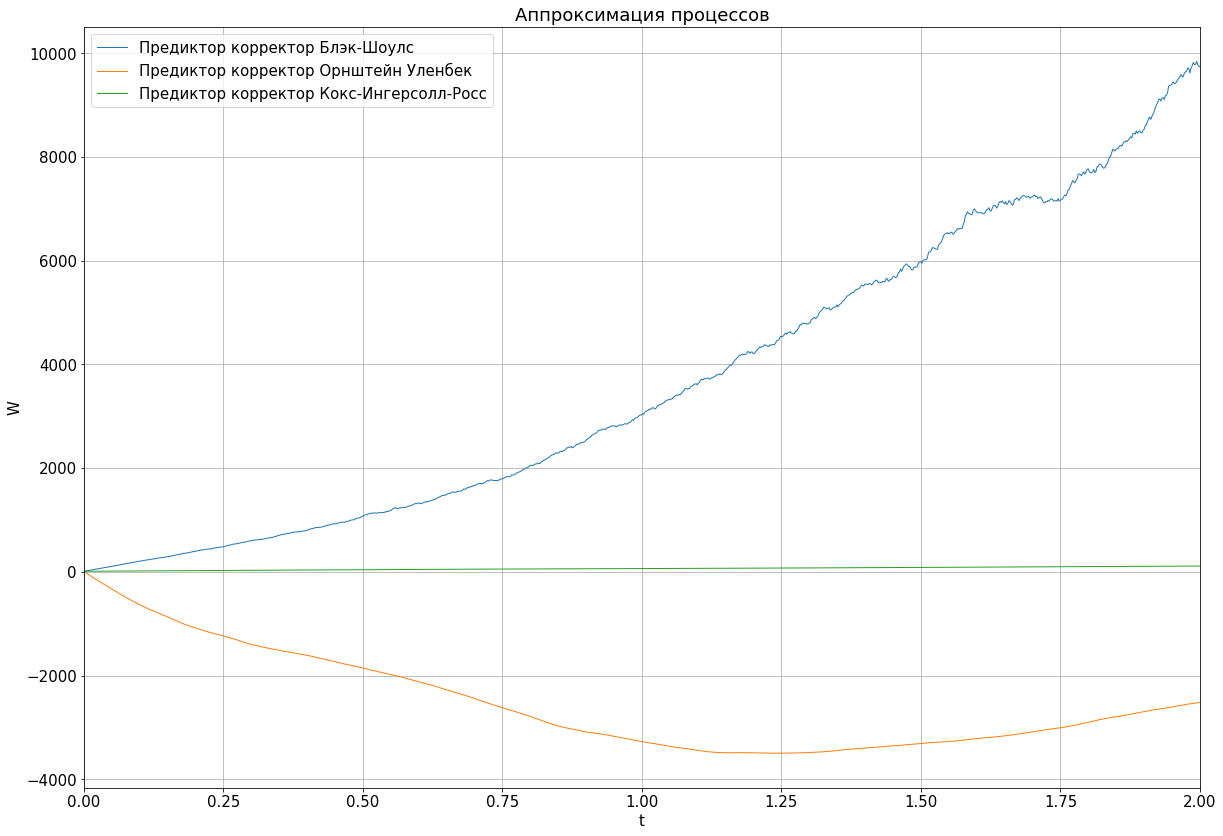

In [ ]:
plt.figure ( figsize =(20, 14) )
plt.grid ()


plt.plot (time_line, PS_bs, linewidth =1.0, label="Предиктор корректор Блэк-Шоулс")
plt.plot (time_line, PS_ou, linewidth =1.0, label="Предиктор корректор Орнштейн Уленбек")
plt.plot (time_line, PS_cir, linewidth =1.0, label= "Предиктор корректор Кокс-Ингерсолл-Росс")

plt.title ("Аппроксимация процессов")
plt.xlabel ("t")
plt.ylabel ("W")
plt.legend()
plt.xlim(0, T)
plt.show ()


In [ ]:
def Mult_Black_Scholes(mu, sigma, t, W):
    return np.exp((mu - (sigma**2)/2)*t + sigma * W)

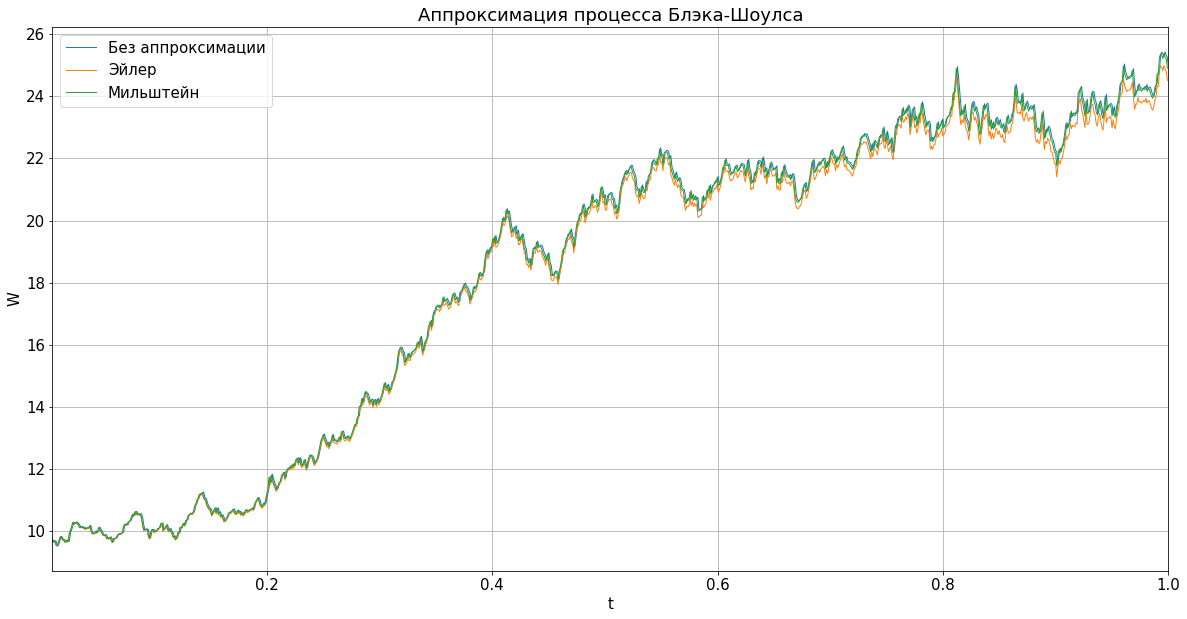

In [ ]:
N = 1000
T = 1
def OU_sample(theta, kappa, sigma, N):
    return rnd.normal(theta/kappa, (sigma**2)/(2*kappa), N)

def GBM_sample(mu, sigma, t, N):
    return np.exp(rnd.normal((mu-(sigma**2)/2)*t, (sigma**2)*t, N))

def CIR_sample(kappa, theta, sigma, S0, t, N):
    m = kappa / theta + (S0 - kappa / theta) * np.exp(-theta * t)
    v = S0 * ((sigma**2) * (np.exp(-theta*t) - np.exp(-2*theta*t))/theta) \
    + kappa * (sigma**2) / (2*(theta**2)) * (1 - np.exp(-2*theta*t))
    return rnd.normal(m, v, N)
time_line, dt = np.linspace(0, T, N, retstep=True)
mu = 1
sigma = 0.2
alpha = 0.33
eta   = 0.25

S_bs, EUS_bs, MS_bs = np.zeros(N), np.zeros(N), np.zeros(N)
errEU, errM = np.zeros(N), np.zeros(N)
S_bs[0], EUS_bs[0], MS_bs[0] = 10, 10, 10

for i in range(1, N):
    dW = W[i] - W[i-1]
    S_bs[i]   = S_bs[0] * Mult_Black_Scholes(mu, sigma, time_line[i], W[i-1])
    EUS_bs[i] = EUS_bs[i-1] + Black_Scholes(S_bs[i-1], 1, 0.2, 1/N, dW)
    MS_bs[i]  = MS_bs[i-1] + Milstein_Black_Scholes(MS_bs[i-1], 1, 0.2, 1/N, dW)   
    errEU[i] = abs(S_bs[i] - EUS_bs[i])
    errM[i]  = abs(S_bs[i] - MS_bs[i])

plt.figure ( figsize =(20, 10) )
plt.grid ()

plt.plot (time_line, S_bs, linewidth =1.0, label="Без аппроксимации")
plt.plot (time_line, EUS_bs, linewidth =1.0, label="Эйлер")
plt.plot (time_line, MS_bs, linewidth =1.0, label="Мильштейн")

plt.title ("Аппроксимация процесса Блэка-Шоулса")
plt.xlabel ("t")
plt.ylabel ("W")
plt.legend()
plt.xlim(1*T/100, T)
plt.show ()

In [ ]:
def Ornshtein_Uhlenbeck_rand(theta1, theta2, sigma, N):
    return np.random.normal(theta1/theta2, (sigma**2)/(2*theta2), N)

def Black_Scholes_rand(mu, sigma, t, N):
    return np.exp(np.random.normal((mu-(sigma**2)/2)*t, (sigma**2)*t, N))

def CIR_rand(theta1, theta2, theta3):
    return np.random.gamma((2*theta1)/(theta3**2), (theta3**2)/(2*theta2), N)

In [ ]:
theta1 = 0.5
theta2 = 0.75
theta3 = 6
mu    = 0.2
sigma = 0.2
N     = 100
t     = 1
S0    = 10

OU_rand  = Ornshtein_Uhlenbeck_rand(theta1, theta2, sigma, N)
BS_rand = Black_Scholes_rand(mu, sigma, t, N)
CIR_rand = CIR_rand(theta2, theta1, theta3)

In [ ]:
import csv

with open('processes.csv', 'w', newline='') as csvfile:
    fieldnames = ['Орнштейн-Уленбек', 'Блэк-Шоулс', 'CIR']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for i in range(len(OU_rand)):
        writer.writerow({'Орнштейн-Уленбек': OU_rand[i], 'Блэк-Шоулс': BS_rand[i], 'CIR': CIR_rand[i]})

0.9-квантиль Орнштейн-Уленбек =  0.7004912595869138


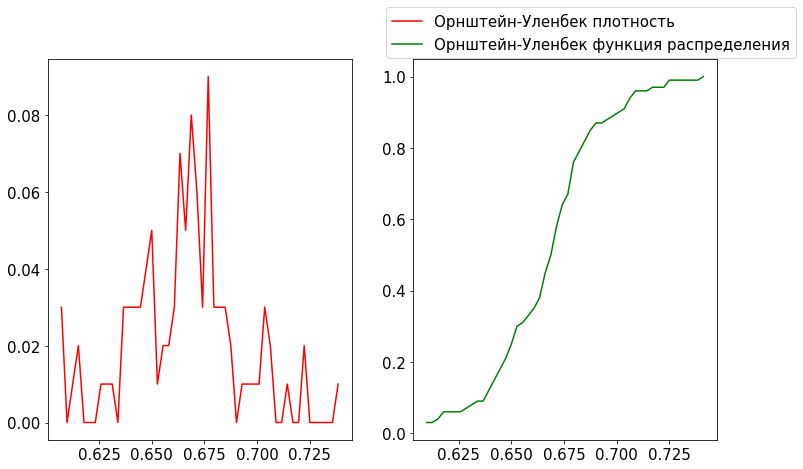

In [ ]:
ou_count, ou_bins_count = np.histogram(OU_rand, bins = 50)
ou_pdf = ou_count / sum(ou_count)
ou_cdf = np.cumsum(ou_pdf)

bsm_count, bsm_bins_count = np.histogram(BS_rand, bins = 50)
bsm_pdf = bsm_count / sum(bsm_count)
bsm_cdf = np.cumsum(bsm_pdf)

cir_count, cir_bins_count = np.histogram(CIR_rand, bins = 50)
cir_pdf = cir_count / sum(cir_count)
cir_cdf = np.cumsum(cir_pdf)

fig, axs = plt.subplots(1, 2, figsize=(12, 7))
axs[0].plot(ou_bins_count[:-1], ou_pdf, label="Орнштейн-Уленбек плотность", color = "red")
axs[1].plot(ou_bins_count[1:], ou_cdf, label="Орнштейн-Уленбек функция распределения", color = "green")
fig.legend()

fig.show()

print("0.9-квантиль Орнштейн-Уленбек = ", np.percentile(OU_rand, 90))

0.9-квантиль Блэк-Шоулс =  1.2725912318728212


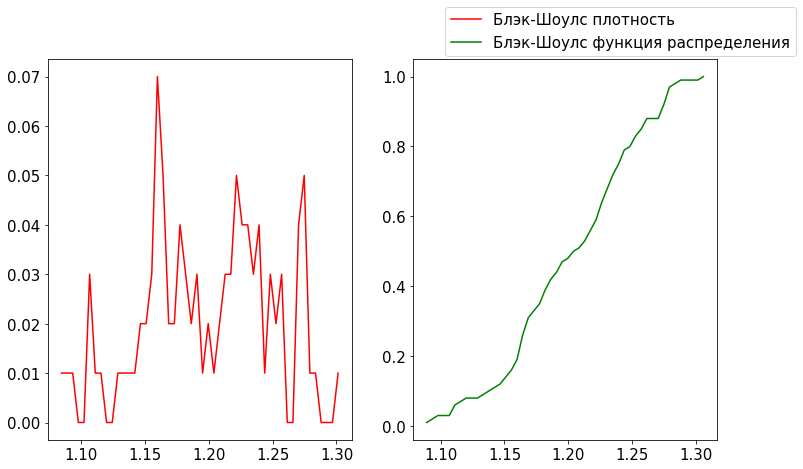

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 7))
axs[0].plot(bsm_bins_count[:-1], bsm_pdf, label="Блэк-Шоулс плотность", color = "red")
axs[1].plot(bsm_bins_count[1:], bsm_cdf, label="Блэк-Шоулс функция распределения", color="green")
print("0.9-квантиль Блэк-Шоулс = ", np.percentile(BS_rand, 90))


fig.legend()

fig.show()

0.9-квантиль CIR =  5.663700555478106


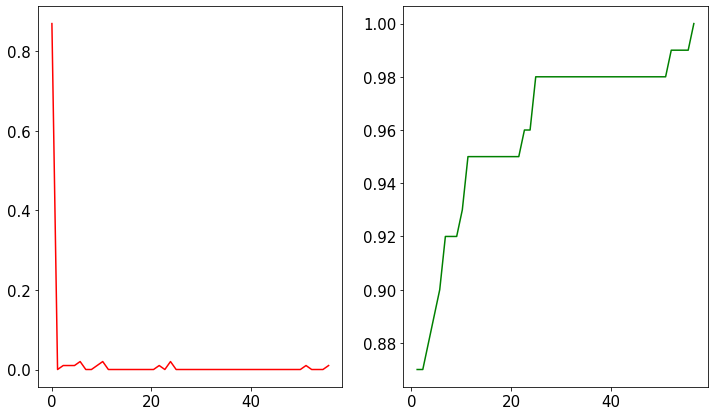

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 7))
axs[0].plot(cir_bins_count[:-1], cir_pdf, label="CIR плотность", color = "red")
axs[1].plot(cir_bins_count[1:], cir_cdf, label="CIR функция распределения", color="green")

print("0.9-квантиль CIR = ", np.percentile(CIR_rand, 90))

In [ ]:
def invariant_law(theta1, theta2, theta3):
  return np.random.normal(theta1 / theta2, theta3**2 / (2 * theta2), 1)

def stationary_law(theta1, theta2, theta3):
  return np.random.gamma(2*theta1 / theta3**2, theta3**2 / (2 * theta2), 1)

N= 1000
inv_rand = []
stat_rand = []

for t in range(1, N + 1):
  inv_rand.append(invariant_law(theta1, theta2, theta3))
  stat_rand.append(stationary_law(theta1, theta2, theta3))

d = {'Инвариантный закон': inv_rand, 'Стационарный закон': stat_rand}
df = pd.DataFrame(d) 
df.to_csv('nums.csv')

Инвариантный закон 0.9-квантиль =  29.817406329839528


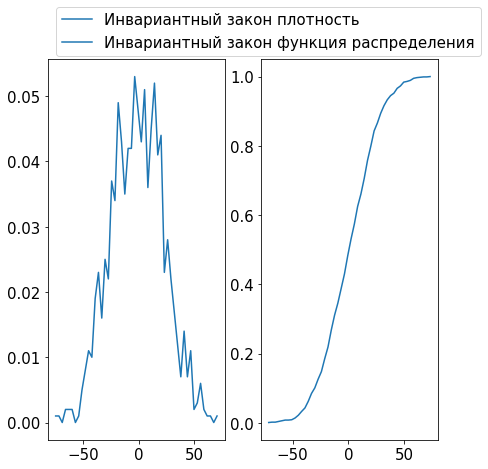

In [ ]:
ik, ik_bins = np.histogram(inv_rand, bins = 50)
il_pdf = ik / sum(ik)
il_cdf = np.cumsum(il_pdf)

sk, st_bins = np.histogram(stat_rand, bins = 50)
sl_pdf = sk / sum(sk)
sl_cdf = np.cumsum(sl_pdf)

fig, axs = plt.subplots(1, 2, figsize=(7, 7))
axs[0].plot(ik_bins[:-1], il_pdf, label="Инвариантный закон плотность")
axs[1].plot(ik_bins[1:], il_cdf, label="Инвариантный закон функция распределения")
fig.legend()
fig.show()

print("Инвариантный закон 0.9-квантиль = ", np.percentile(inv_rand, 90))

Стационарный закон 0.9-квантиль =   0.625056856601387


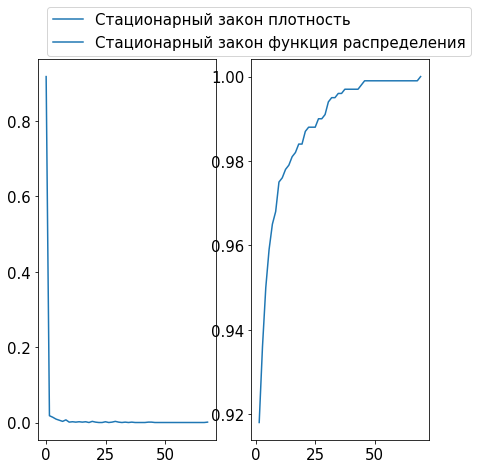

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(7, 7))
axs[0].plot(st_bins[:-1], sl_pdf, label="Стационарный закон плотность")
axs[1].plot(st_bins[1:], sl_cdf, label="Стационарный закон функция распределения")
print("Стационарный закон 0.9-квантиль =  ", np.percentile(stat_rand, 90))
fig.legend()
fig.show()

In [ ]:
def beta1(X, n):
  s1, s2, s3, s4 = 0, 0, 0, 0
  for i in range(1, n):
    s1 += X[i] * X[i - 1]
    s2 += X[i]
    s3 += X[i - 1]
    s4 += X[i - 1]**2
  bet1 = (s1 / n - s2 * s3 / n**2) / (s4 / n - s3**2 / n**2)
  return bet1


def beta2(X, n, b1):
  sum = 0
  for i in range (1, n):
    sum += (X[i] - b1 * X[i - 1])
  res = (sum / n) / (1 - b1)
  return res

def beta3 (X, n, b1, b2):
  sum = 0
  for i in range (1, n):
    sum += (X[i] - b1 * X [i - 1] - b2 * (1 - b1))** 2
  res = sum / (n * b1)
  return res

In [ ]:
kappa = 3
mu = 1
sigma = 2
N = 1000
X_ou = np.zeros(N)
X_ou[0] = 10
for i in range(1, N):
    X_ou[i] = X_ou[i - 1] + Ornshtein_Uhlenbeck(X_ou[i - 1], kappa, mu, sigma, 1/N)

In [ ]:
b_1 = beta1(X_ou, len(X_ou))
b_2 = beta2(X_ou, len(X_ou), b_1)
b_3 = beta3(X_ou, len(X_ou), b_1, b_2)

kappa_est= (-1 / (1/N)) * np.log(b_1)
mu_est = b_2
sigma_est = np.sqrt(2 * kappa_est * b_3 / (1 - b_1 ** 2))

print('kappa =', kappa_est)
print('mu =', mu_est)
print('sigma =', sigma_est)

kappa = 2.990927973703411
mu = 1.160586443153598
sigma = 2.0737680940639756


In [ ]:
kappa = 0
alpha = 3
sigma = 2
N = 1000
delta = 1 / N

def theta_2(X, delta, n):
  t1 = 0
  t2 = 0
  for i in range(1, n):
    t1 += X[i] * X[i - 1]
    t2 += X[i-1] ** 2
  t_2 = -np.log(t1 / t2) / (1/N)
  return t_2

def theta_3(X, delta, n, t_2):
  t1 = 0
  t2 = 0
  for i in range(1, n):
    t1 += (X[i] - X[i - 1] * np.exp(-delta * t_2)) ** 2 
  t2 = (2 * t_2) / (n * (1 - np.exp(-2 * delta * t_2)))
  return t1 * t2

X_ou = np.zeros(N)
X_ou[0] = 10
for i in range(1, N):
    X_ou[i] = X_ou[i - 1] + Ornshtein_Uhlenbeck(X_ou[i - 1], alpha, kappa, sigma, 1 / N)

theta2_est = theta_2(X_ou, delta, len(X_ou))
theta3_est = theta_3(X_ou, delta, len(X_ou), theta2_est) ** 0.5


print('Theta_2=', theta2_est)
print('Theta_3=', theta3_est)


Theta_2= 3.144228845986183
Theta_3= 2.0081202178836155


In [ ]:
from pymle.models import CKLS
import scipy.stats as st
from pymle.sim.Simulator1D import Simulator1D
from pymle.fit.AnalyticalMLE import AnalyticalMLE
from pymle.TransitionDensity import EulerDensity



model = CKLS()  
model.params = np.array([1, 2, 0.5, 0.3])

S0 = 2 
T = 2  
freq = 1000  
dt = 1. / freq
seed = None

simulator = Simulator1D(S0=S0, M=T * freq, dt=dt, model=model).set_seed(seed=seed)
sample = simulator.sim_path()

param_bounds = [(0, 5), (0, 5), (0, 5), (0, 5)]

guess = np.array([0.5, 0.9, 0.9, 0.9])

theta1 = []
theta2 = []
theta3 = []
theta4 = []

for i in range (0, 100):
    print(i)
    simulator = Simulator1D(S0=S0, M=T * freq, dt=dt, model=model).set_seed(seed=seed)
    sample = simulator.sim_path()
    euler_est = AnalyticalMLE(sample, param_bounds, dt, density=EulerDensity(model)).estimate_params(guess)
    theta1.append(euler_est.params[0])
    theta2.append(euler_est.params[1])
    theta3.append(euler_est.params[2])
    theta4.append(euler_est.params[3])

print("Theta_1: ", st.t.interval(alpha=0.95, df=len(theta1)-1, loc=np.mean(theta1), scale=st.sem(theta1)))

print("Theta_2: ", st.t.interval(alpha=0.95, df=len(theta2)-1, loc=np.mean(theta2), scale=st.sem(theta2)) )

print("Theta_3: ", st.t.interval(alpha=0.95, df=len(theta3)-1, loc=np.mean(theta3), scale=st.sem(theta3)))

print("Theta_4: ", st.t.interval(alpha=0.95, df=len(theta4)-1, loc=np.mean(theta4), scale=st.sem(theta4)))

print(f'\nEuler MLE: {euler_est} ')

0
Initial Params: [0.5 0.9 0.9 0.9]
Initial Likelihood: -148.89828747125807


/usr/local/lib/python3.8/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`xtol` termination condition is satisfied.
Number of iterations: 92, function evaluations: 450, CG iterations: 253, optimality: 3.76e-04, constraint violation: 0.00e+00, execution time: 0.62 s.
Final Params: [2.15839144 2.01190399 0.44852731 0.32834809]
Final Likelihood: 3701.289004259753
1
Initial Params: [0.5 0.9 0.9 0.9]
Initial Likelihood: -297.1664626852212
`xtol` termination condition is satisfied.
Number of iterations: 100, function evaluations: 480, CG iterations: 299, optimality: 6.84e-05, constraint violation: 0.00e+00, execution time:  1.2 s.
Final Params: [2.7641847  2.0185277  0.4391675  0.33399572]
Final Likelihood: 3654.0126750628865
2
Initial Params: [0.5 0.9 0.9 0.9]
Initial Likelihood: -305.9336377480123
`xtol` termination condition is satisfied.
Number of iterations: 61, function evaluations: 285, CG iterations: 182, optimality: 2.52e-04, constraint violation: 0.00e+00, execution time: 0.88 s.
Final Params: [2.32759755 2.02284212 0.41234963 0.35292913]
Final Likeliho

In [ ]:
print(f"Theta_1 = {np.array(theta1).mean()}, Theta_2 = {np.array(theta2).mean()}")
print(f"Theta_3 = {np.array(theta3).mean()}, Theta_4 = {np.array(theta4).mean()}")

Theta_1 = 3.2254460451516156, Theta_2 = 2.158350357783192
Theta_3 = 0.6210081322465119, Theta_4 = 0.2458879330343412
